In [7]:
from google.colab import drive
drive.mount('/content/drive/Skole/RUC')

ValueError: ignored

In [ ]:
pip install pysindy

In [3]:
ls

sample_data/


In [6]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt

x = np.load('datatest.npy')

plt.plot(x[:,0], x[:,1])

FileNotFoundError: ignored

In [ ]:
model = ps.SINDy()

t = np.arange(0, 10, 0.01)

model.fit(x, t=t)
model.print()

x0' = -10.156 1 + 1.179 x0 + 5.916 x1 + -0.283 x0 x1 + -0.785 x1^2
x1' = 0.425 x0^2


x' = 1.000 sin(2 y)
y' = -1.000 cos(1 x) + 1.000


0.999999531750837

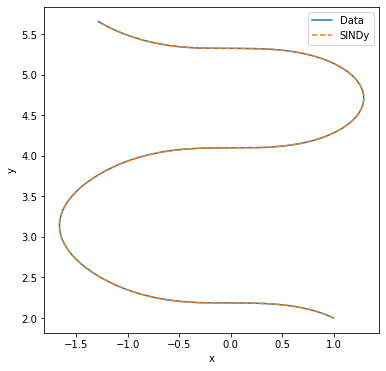

In [ ]:
fourier_library = ps.FourierLibrary(n_frequencies=2)
optimizer = ps.STLSQ(threshold=0.02, fit_intercept=True)

model = ps.SINDy(
        feature_library = fourier_library,
        optimizer=optimizer,
        feature_names = ['x', 'y'])

model.fit(x, t=t)
model.print()

x_model = model.simulate(x[0, :], t)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x[:, 0], x[:, 1], label='Data')
ax.plot(x_model[:, 0], x_model[:, 1], '--', label='SINDy')
ax.set(xlabel='x', ylabel='y')
ax.legend()

model.score(x, t=t)

x' = 1.000 sin(2 y)
y' = -1.000 cos(1 x) + 0.986


0.9990410941853269

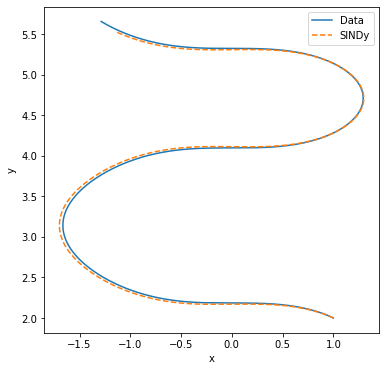

In [ ]:
fourier_library = ps.FourierLibrary(n_frequencies=2)
optimizer = ps.STLSQ(threshold=0.002, fit_intercept=True)

model = ps.SINDy(
        feature_library = fourier_library,
        optimizer=optimizer,
        feature_names = ['x', 'y'])

xd = np.gradient(x[:, 0], t)
yd = np.gradient(x[:, 1], t)
dot = np.array([xd, yd]).T # .T is to transpose the array


model.fit(x, t=t, x_dot=dot)
model.print()

x_model = model.simulate(x[0, :], t)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x[:, 0], x[:, 1], label='Data')
ax.plot(x_model[:, 0], x_model[:, 1], '--', label='SINDy')
ax.set(xlabel='x', ylabel='y')
ax.legend()

model.score(x, t=t)

In [ ]:
dot

In [ ]:
dot.shape

In [ ]:
x.shape

In [ ]:
x_model.shape

In [ ]:
t.shape

x'' = -0.583 x' + 0.164 y' + 0.123 x'^2 + -0.001 x' y' + -0.031 y'^2 + -0.315
y'' = -0.555 x' + -0.893 y' + -0.030 x'^2 + 0.109 x' y' + 0.122 y'^2 + 1.462


-0.9391838967316409

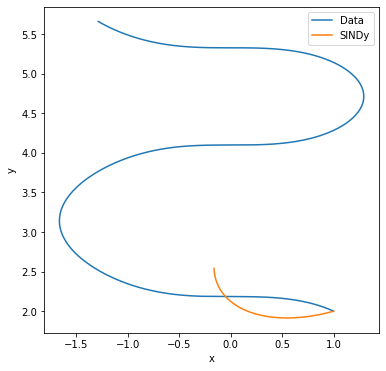

In [ ]:
optimizer = ps.STLSQ(threshold=0.0001, fit_intercept=True)
# diff_method = ps.FiniteDifference(order=2)

model = ps.SINDy( 
        optimizer=optimizer,
        feature_names = ["x'", "y'"])

xd = np.gradient(x[:, 0], t)
yd = np.gradient(x[:, 1], t)
dot = np.array([xd, yd]).T # .T is to transpose the array

xdd = np.gradient(xd, t)
ydd = np.gradient(yd, t)
ddot = np.array([xdd, ydd]).T

model.fit(x, t=t, x_dot=ddot)
model.print()

x_model = model.simulate(x[0, :], t)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x[:, 0], x[:, 1], label='Data')
ax.plot(x_model[:, 0], x_model[:, 1], '-', label='SINDy')
ax.set(xlabel='x', ylabel='y')
ax.legend()
model.score(x, t=t)

In [ ]:
ddot.shape

(2, 1000)

In [ ]:
dot.shape

(1000, 2)